# Classifying profitable plan for a telecom company
**Task:**
Build Machine Learning model for the classification problem, which finds a suitable tariff

**Description:**
The mobile operator found out: many customers use archived rates. A preliminary analysis of the use of tariffs on a sample of customers was carried out, the behavior of customers when using the operator's services was analyzed and the optimal sets of services for users were recommended. Hypotheses about the difference in revenue of subscribers of different tariffs and differences in the revenue of subscribers from Moscow and other regions. A profitable tariff plan has been identified for adjusting the advertising budget. A system has been developed that can analyze customer behavior and offer users a new tariff. A model has been built for the classification problem, which will select a suitable tariff. A model was built with the highest possible accuracy. The share of correct answers has been brought to 0.75. Accuracy was checked on the test sample.

**Scope of Activities:**
Telecom, Advertising platforms, IT company, Startups, Business services [b2b]

**Used Libraries:**
Python, Pandas, Matplotlib, numpy, SciPy, descriptive statistics, statistical hypothesis testing, math, Seaborn, sklearn, machine learning

## 1. Let's look at the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.dummy import DummyClassifier
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('users_behavior.csv')

In [3]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.shape

(3214, 5)

In [6]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

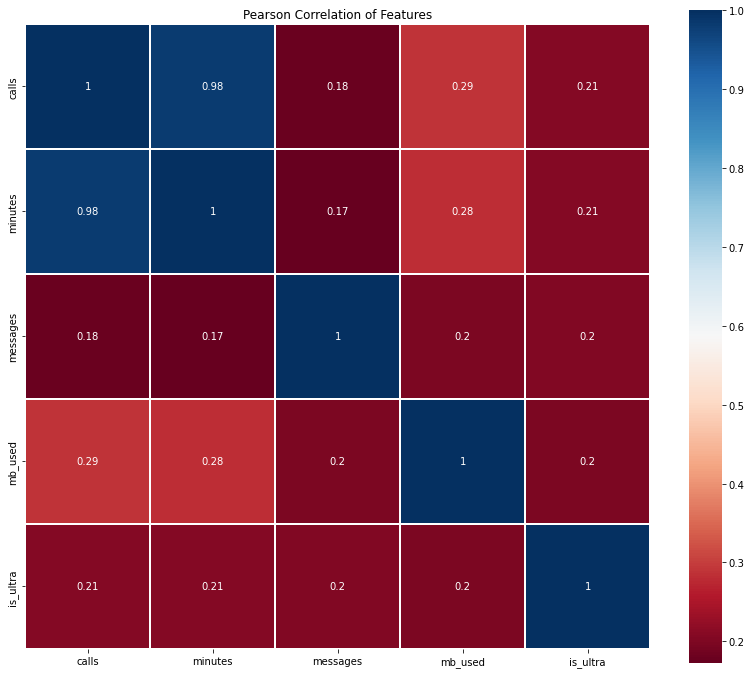

In [7]:
colormap=plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features')
sns.heatmap(df.corr(),
            linewidths=0.1, vmax=1.0,
            square=True, annot=True, cmap=colormap)

**Conclusion 1**:
The data file consists of 5 columns (1 integer and 4 floating point) and 3214 records.

The is_ultra column contains the target attribute. Remembers that this is a classification feature.
All fields are filled in, no preprocessing is needed, because it was carried out in another project.

The average value in the is_ultra attribute, it means the share of users of the "Ultra" tariff, and additionally indicates an imbalance of classes in the target attribute, that is, an unequal ratio of classes 0 and 1 (in this case — 70:30). This can be important when training models.

## 2.Break the data into samples

In [8]:
df_train, df_valid = train_test_split(df, test_size=0.40, random_state=1410, stratify=df['is_ultra'])
df_valid, df_test = train_test_split(df_valid,test_size = 0.5, random_state=1410, stratify=df_valid['is_ultra'])
print('Training sample size:', df_train.shape[0],'objects')
print('Validation sample size:', df_valid.shape[0],'objects')
print('Testing sample size:',df_test.shape[0],'objects')



Training sample size: 1928 objects
Validation sample size: 643 objects
Testing sample size: 643 objects


In [9]:
# create variables for attributes and target attribute >

#for the training sample

features_train = df_train.drop(['is_ultra'], axis=1)

target_train = df_train['is_ultra']

#for the validation sample

features_valid = df_valid.drop(['is_ultra'], axis=1)

target_valid =  df_valid['is_ultra'] 

#for the testing sample
features_test = df_test.drop(['is_ultra'], axis=1)

target_test = df_test['is_ultra']




**Conclusion 2**: the data were divided into training (60%), validation (20%) and test (20%) samples

## 3. Models

### DecisionTree

In [10]:
best_model = None

best_result = 0

for depth in range(1, 21):

    model = DecisionTreeClassifier(random_state=1410, max_depth=depth) 

    model.fit(features_train, target_train) 

    predictions= model.predict(features_valid) 

    result= accuracy_score(target_valid, predictions) 

    if result > best_result:

        best_model = model

        best_result = result

        

print("The best model's accuracy:", best_result)
print("the best model", best_model)


The best model's accuracy: 0.7962674961119751
the best model DecisionTreeClassifier(max_depth=8, random_state=1410)


### Random Forest

In [11]:
best_model = None
best_result = 0
for est in range(1, 51):
    model = RandomForestClassifier(random_state=1410, n_estimators=est) 
    model.fit(features_train,target_train) 
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions) 
    if result > best_result:
        best_model = model 
        best_result = result
print("The best model's accuracy:", best_result)
print("the best model", best_model)


The best model's accuracy: 0.7931570762052877
the best model RandomForestClassifier(n_estimators=46, random_state=1410)


### Logistic Regression

In [12]:
model = LogisticRegression(random_state=1410, max_iter=100) 
model.fit(features_train,target_train) 
predictions = model.predict(features_valid)
result = accuracy_score(target_valid, predictions) 
    

        
print("Accuracy Logistic Regression:", result)

Accuracy Logistic Regression: 0.6982892690513219


### K-Nearest Neighbors

In [13]:
best_model = None
best_result = 0
for n in range(1, 21):
    model = KNeighborsClassifier(n_neighbors = n)# Fit the classifier to the data
    model.fit(features_train,target_train) 
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions) 
    if result > best_result:
        best_model = model     
        best_result = result   
print("The best model's accuracy:", best_result)
print("the best model", best_model)

The best model's accuracy: 0.7682737169517885
the best model KNeighborsClassifier(n_neighbors=13)


**Conclusion_3:**
Three models were investigated: Decision Tree, Random Forest, Logistic Regression, k-nearest neighbors
After the research, we got the following best models:
1) The decision tree with 8 trees accuracy: 0.7962674961119751

2) In a random forest with 46 trees, accuracy 0.7931570762052877

3) logistic regression accuracy: 0.6982892690513219

4) The nearest neighbors with 13 neighbors accuracy: 0.7682737169517885

The best model, judging by accuracy, is a **decision tree**, but we will check on a test sample another **random forest** to accurately determine the choice of the model

## Check the model on a test sample

### Random Forest

In [14]:
model = RandomForestClassifier(random_state=1410, n_estimators=46)
model.fit(features_train,target_train)
predictions = model.predict(features_test)
score = accuracy_score(target_test, predictions)   
print('Accuracy:', score)

Accuracy: 0.7869362363919129


### Decision Tree

In [15]:
model = DecisionTreeClassifier(random_state=1410, max_depth=8) 
model.fit(features_train, target_train) 
predictions = model.predict(features_test)
score = accuracy_score(target_test, predictions)   
print('Accuracy:', score)

Accuracy: 0.807153965785381


It seems we have a leader, a DECISION TREE

## Additional task: check the models for adequacy.

In [16]:
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(features_train, target_train)

predictions = dummy_classifier.predict(features_test) 
result = accuracy_score(target_test, predictions) 

print(result)

0.6936236391912908


**Conclusion**: This value is less than that of our model. The accuracy of our best model is more than 80%. It can be concluded that the adequacy test has been passed